In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving sales_data_with_discounts.csv to sales_data_with_discounts.csv


In [7]:
df = pd.read_csv('sales_data_with_discounts.csv')

In [8]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

In [9]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [20]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [22]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [32]:
# Identify numerical and categorical columns
numerical_column = df.select_dtypes(include=['int64','float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [31]:
# compute basic statistics
desc_stats = df[numerical_column].describe()
# mode_vals = df[numerical_column].mode().iloc(0)
print(desc_stats)
# print(mode_vals)

           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     47847.912852  
max   

In [39]:
# Calculate statistics
mean_values = df[numerical_column].mean()
median_values = df[numerical_column].median()
mode_values = df[numerical_column].mode().iloc[0]  # First mode in case of multiple modes
std_values = df[numerical_column].std()

In [40]:
# Combine results into a DataFrame
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_values
})

In [41]:
# Display results
print(stats_df)

                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


In [42]:
# Set style for better visuals
sns.set_style("whitegrid")

Text(0.5, 0.98, 'Histograms of Numerical Columns')

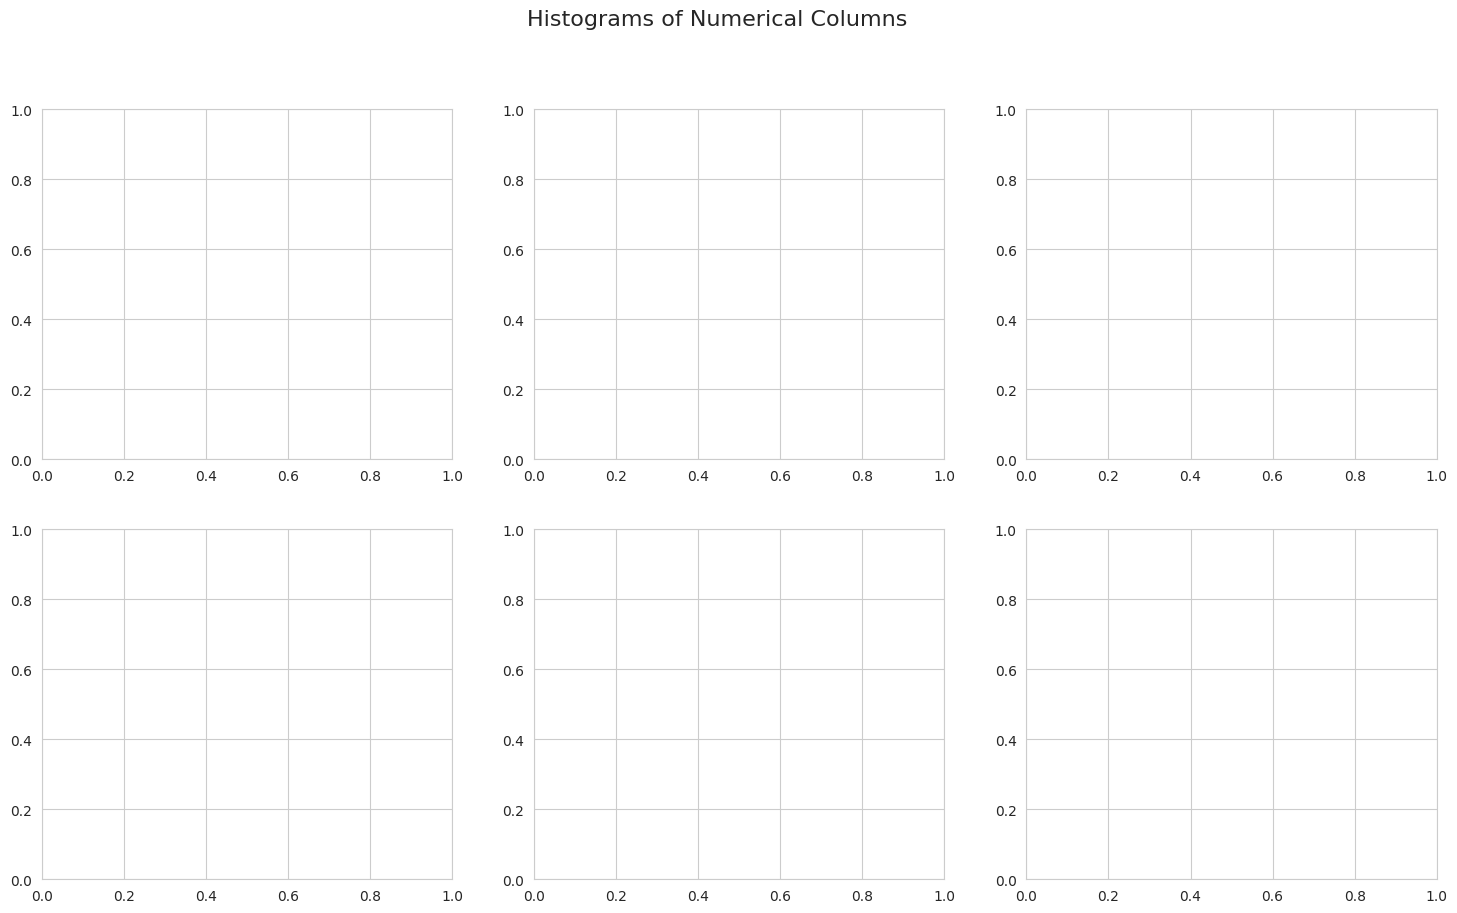

In [43]:
# Create histograms for numerical columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Histograms of Numerical Columns", fontsize=16)

In [46]:
for ax, column in zip(axes.flatten(), numerical_column):
    sns.histplot(df[column], bins=30, kde=True, ax=ax, color='orange')
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

In [47]:
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 640x480 with 0 Axes>

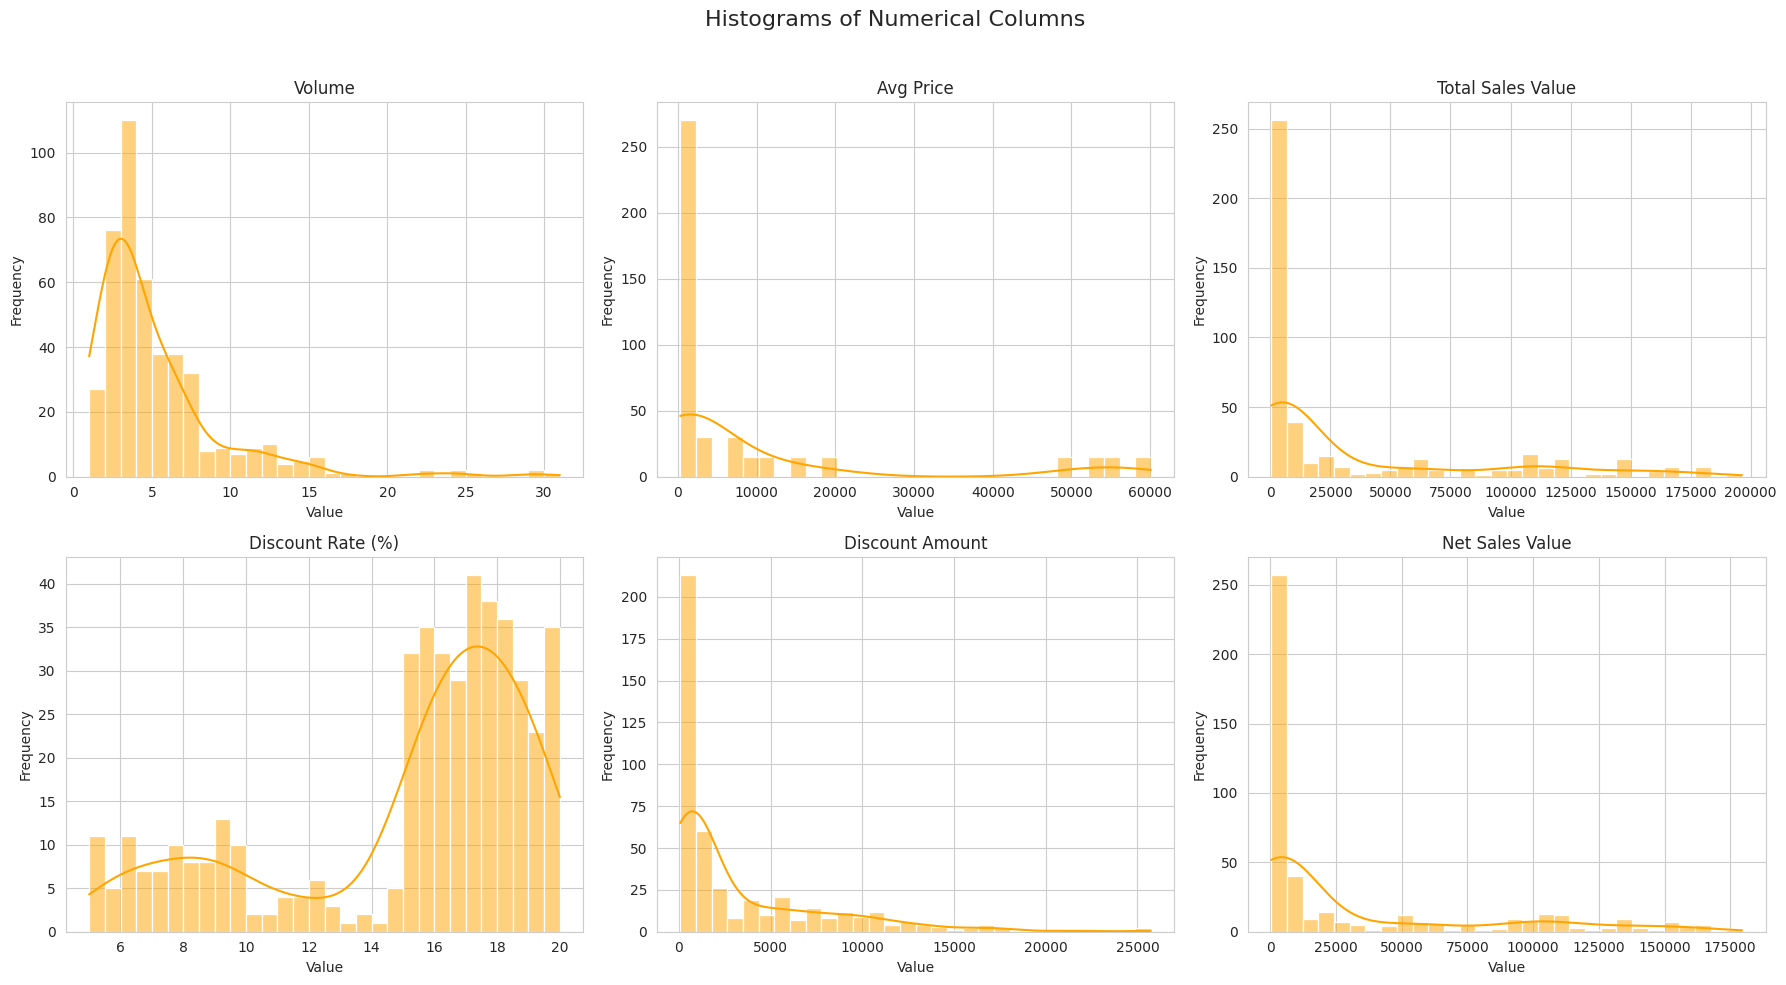

In [49]:
# Set style for better visuals
sns.set_style("whitegrid")

# Create histograms for numerical columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Histograms of Numerical Columns", fontsize=16)

for ax, column in zip(axes.flatten(), numerical_column):
    sns.histplot(df[column], bins=30, kde=True, ax=ax, color='orange')
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [50]:
# Analyze distribution
for column in numerical_column:
    skewness = df[column].skew()
    print(f"{column} - Skewness: {skewness:.2f}")

    if skewness > 1:
        print(f"{column} is highly right-skewed, indicating a few large values dominate the distribution.")
    elif skewness < -1:
        print(f"{column} is highly left-skewed, indicating a concentration of smaller values.")
    else:
        print(f"{column} has a relatively symmetric distribution.")

    # Check for outliers using IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column} - Number of outliers: {len(outliers)}")
    print("-" * 50)

Volume - Skewness: 2.73
Volume is highly right-skewed, indicating a few large values dominate the distribution.
Volume - Number of outliers: 44
--------------------------------------------------
Avg Price - Skewness: 1.91
Avg Price is highly right-skewed, indicating a few large values dominate the distribution.
Avg Price - Number of outliers: 60
--------------------------------------------------
Total Sales Value - Skewness: 1.53
Total Sales Value is highly right-skewed, indicating a few large values dominate the distribution.
Total Sales Value - Number of outliers: 36
--------------------------------------------------
Discount Rate (%) - Skewness: -1.06
Discount Rate (%) is highly left-skewed, indicating a concentration of smaller values.
Discount Rate (%) - Number of outliers: 45
--------------------------------------------------
Discount Amount - Skewness: 1.91
Discount Amount is highly right-skewed, indicating a few large values dominate the distribution.
Discount Amount - Number o

Volume - Extreme Values: [15 13 11 29 13 24 14 12 25 15 11 15 14 12 12 12 22 11 11 12 12 14 11 11
 15 31 12 16 24 11 12 12 22 11 13 15 12 14 14 11 29 15 13 17]
--------------------------------------------------
Avg Price - Extreme Values: [49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100]
--------------------------------------------------
Total Sales Value - Extreme Values: [181500 147300 180300 133100 147300 165300 180300 196400 147300 147300
 162300 162300 145200 147300 162300 165300 180300 169400 147300 181500
 140700 147300 165300 145200 147300 165300 180300 165300 180300 140700
 147300 133100 147300 157300 147300 165300]
--------------------------------------------------


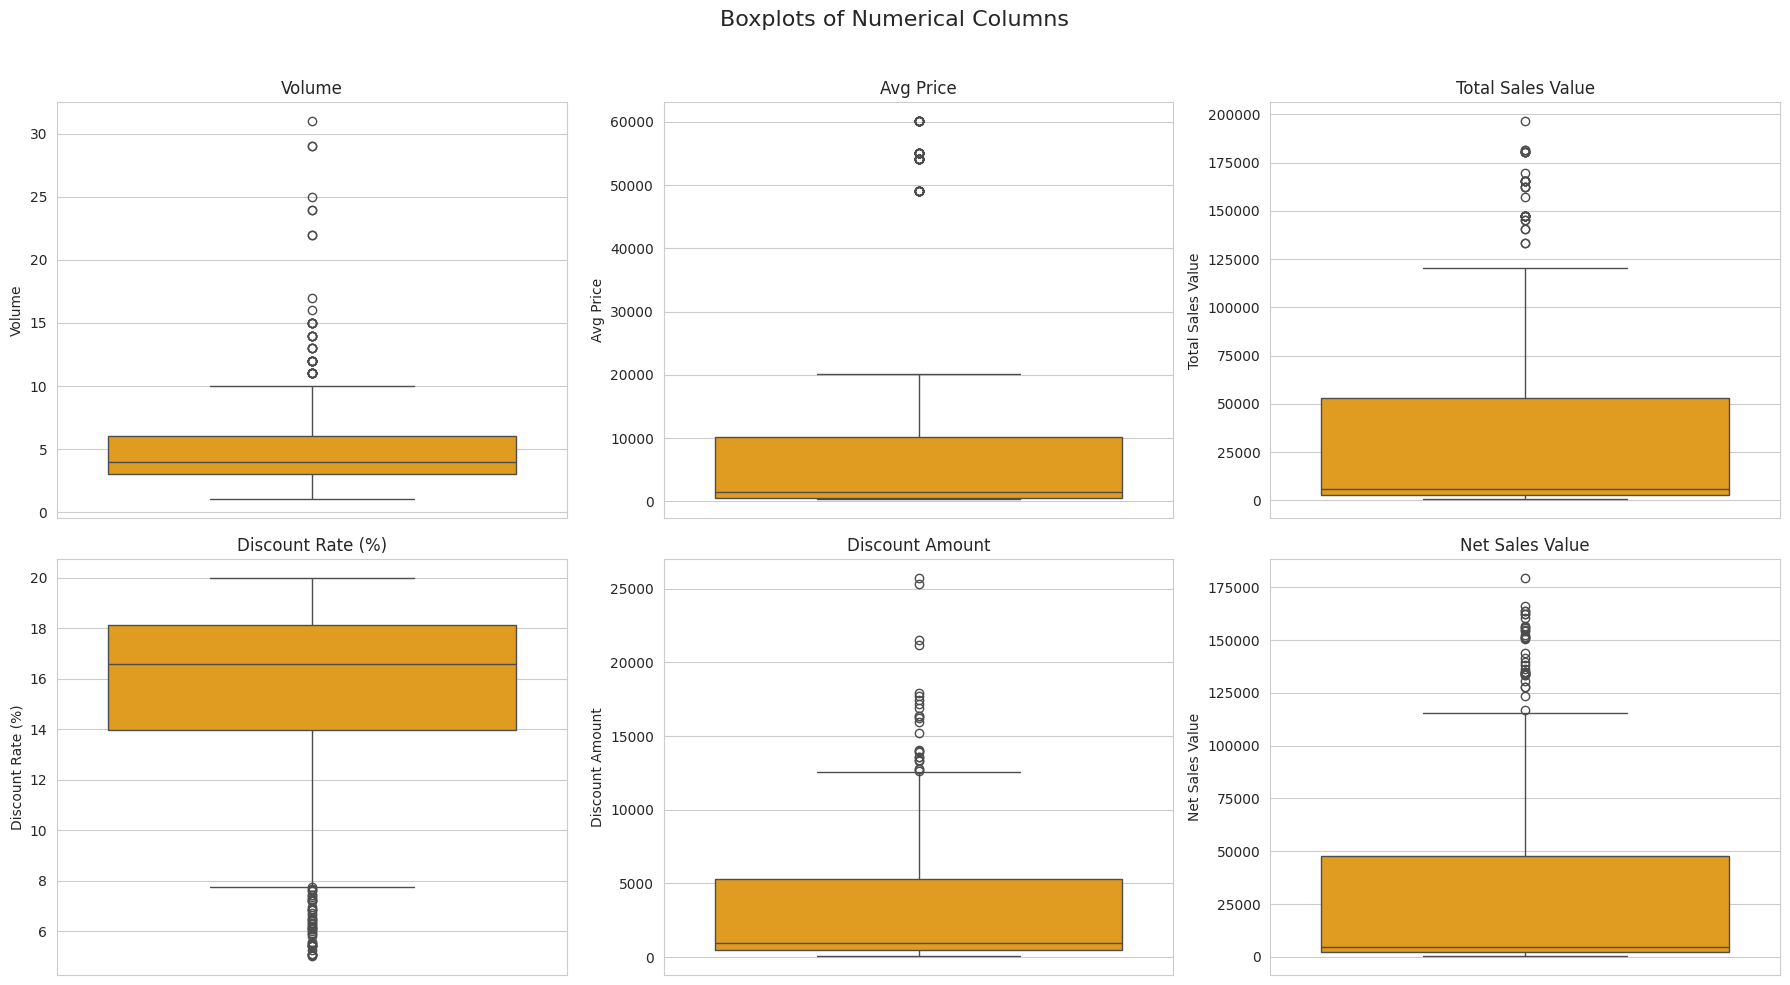

In [54]:
# Create boxplots for numerical columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplots of Numerical Columns", fontsize=16)

for ax, column in zip(axes.flatten(), numerical_column):
    sns.boxplot(y=df[column], ax=ax, color='orange')
    ax.set_title(column)

# Highlight extreme values
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    extreme_values = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"{column} - Extreme Values: {extreme_values.values}")
    print("-" * 50)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Text(0.5, 0.98, 'Bar Charts of Categorical Columns')

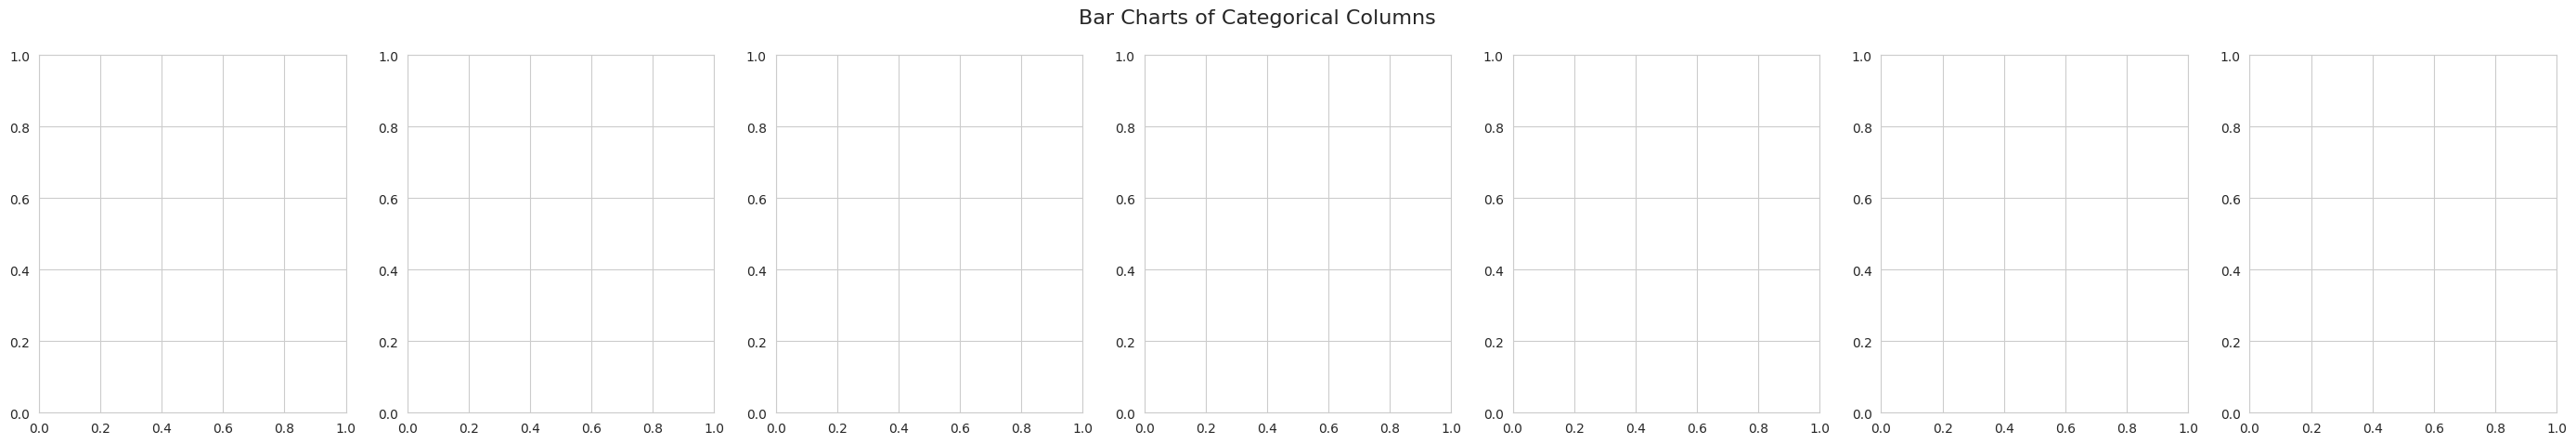

In [55]:
# Create bar charts for categorical columns
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(5 * len(categorical_columns), 5))
fig.suptitle("Bar Charts of Categorical Columns", fontsize=16)

In [56]:
for ax, column in zip(axes, categorical_columns):
    sns.countplot(x=df[column], ax=ax, palette='viridis')
    ax.set_title(column)
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

<ipython-input-56-cf6d8de4c08a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=ax, palette='viridis')
<ipython-input-56-cf6d8de4c08a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=ax, palette='viridis')
<ipython-input-56-cf6d8de4c08a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=ax, palette='viridis')
<ipython-input-56-cf6d8de4c08a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

In [57]:
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 640x480 with 0 Axes>

<ipython-input-61-563c918489ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=ax, palette='viridis')
<ipython-input-61-563c918489ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=ax, palette='viridis')
<ipython-input-61-563c918489ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=ax, palette='viridis')
<ipython-input-61-563c918489ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

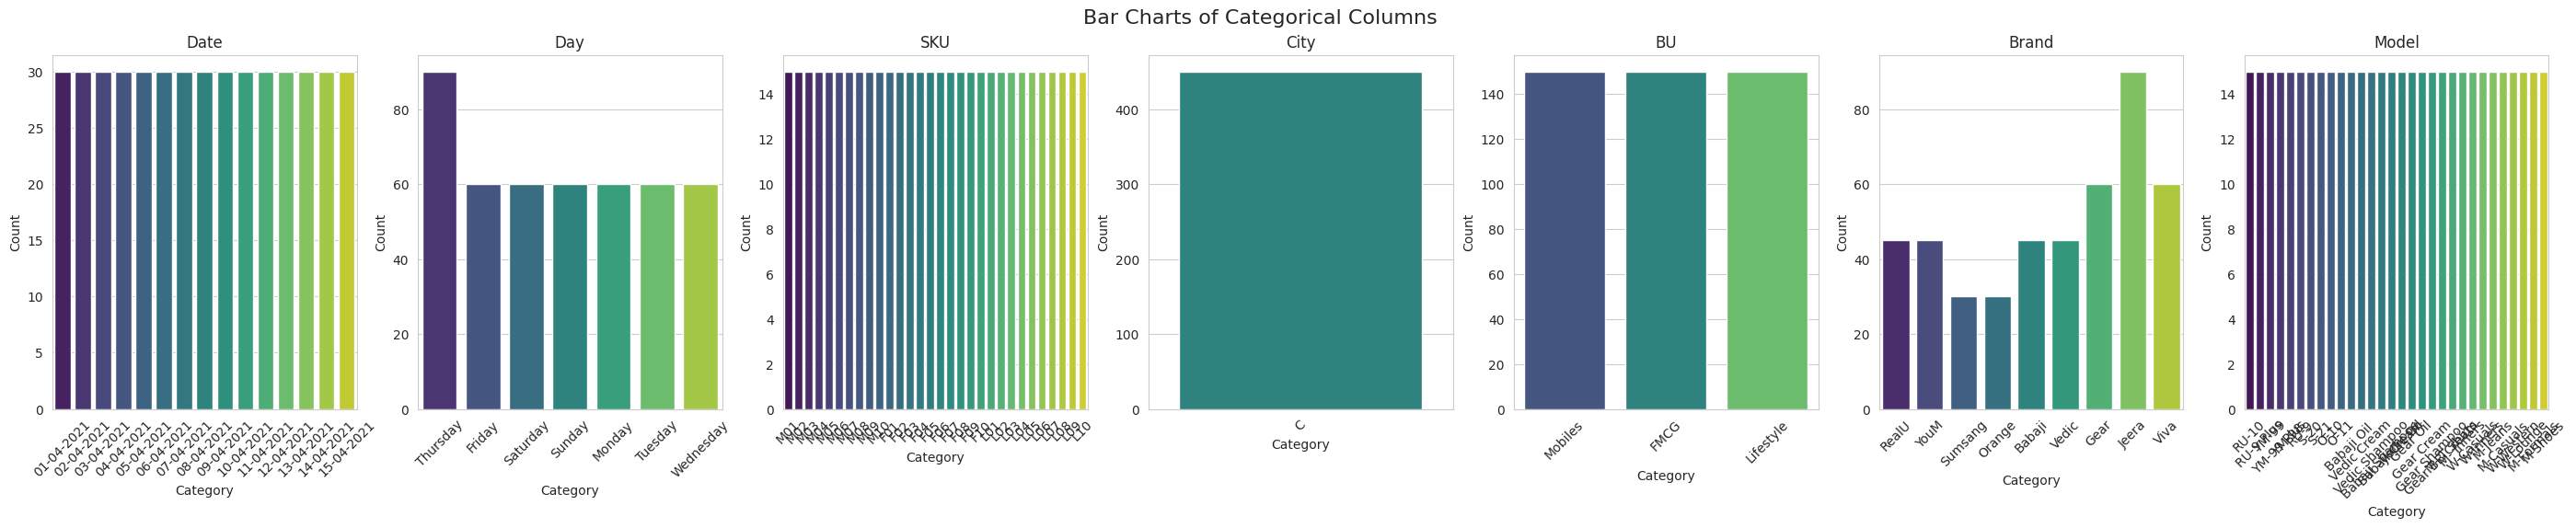

In [61]:
# Create bar charts for categorical columns
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(5 * len(categorical_columns), 5))
fig.suptitle("Bar Charts of Categorical Columns", fontsize=16)

if len(categorical_columns) == 1:
    axes = [axes]  # Ensure axes is iterable

for ax, column in zip(axes, categorical_columns):
    sns.countplot(x=df[column], ax=ax, palette='viridis')
    ax.set_title(column)
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

In [59]:
# Analyze categorical distributions
for column in categorical_columns:
    print(f"Category Distribution for {column}:")
    print(df[column].value_counts())
    print("-" * 50)

Category Distribution for Date:
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64
--------------------------------------------------
Category Distribution for Day:
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64
--------------------------------------------------
Category Distribution for SKU:
SKU
M01    15
M02    15
L09    15
L08    15
L07    15
L06    15
L05    15
L04    15
L03    15
L02    15
L01    15
F10    15
F09    15
F08    15
F07    15
F06    15
F05    15
F04    15
F03    15
F02    15
F01    15
M10    15
M09    15
M08    15
M07    15
M06    15
M05    15
M04    15
M03    15
L10    15
Name: count, dtype: int64
----------------------------------------------

In [1]:
# Explanation of Standardization
print("\nExplanation of Standardization:")
print("Standardization (Z-score normalization) transforms numerical data by subtracting the mean (\u03BC) and dividing by the standard deviation (\u03C3), bringing all values to a common scale with a mean of 0 and a standard deviation of 1.")
print("Formula: Z = (X - \u03BC) / \u03C3")
print("This helps in improving model performance by ensuring uniformity across numerical features.")



Explanation of Standardization:
Standardization (Z-score normalization) transforms numerical data by subtracting the mean (μ) and dividing by the standard deviation (σ), bringing all values to a common scale with a mean of 0 and a standard deviation of 1.
Formula: Z = (X - μ) / σ
This helps in improving model performance by ensuring uniformity across numerical features.


In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [12]:
# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = encoder.fit_transform(df[categorical_columns])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))


In [13]:
# Merge encoded categorical data back into the dataset
df_transformed = pd.concat([df.drop(columns=categorical_columns), categorical_encoded_df], axis=1)

In [14]:
# Display portion of transformed dataset
print("Transformed Dataset (with One-Hot Encoding):\n", df_transformed.head())


Transformed Dataset (with One-Hot Encoding):
    Volume  Avg Price  Total Sales Value  ...  Model_YM-98   Model_YM-99  Model_YM-99 Plus
0      15      12100             181500  ...           0.0          0.0               0.0
1      10      10100             101000  ...           0.0          0.0               0.0
2       7      16100             112700  ...           0.0          1.0               0.0
3       6      20100             120600  ...           0.0          0.0               1.0
4       3       8100              24300  ...           1.0          0.0               0.0

[5 rows x 94 columns]


In [15]:
# Explanation of One-Hot Encoding
print("\nExplanation of One-Hot Encoding:")
print("One-hot encoding converts categorical variables into binary columns where each unique category gets a separate column with values 0 or 1.")
print("This allows machine learning models to process categorical data effectively without assuming any inherent order.")



Explanation of One-Hot Encoding:
One-hot encoding converts categorical variables into binary columns where each unique category gets a separate column with values 0 or 1.
This allows machine learning models to process categorical data effectively without assuming any inherent order.


In [16]:
# Summary of Key Findings
print("\nSummary of Key Findings:")
print("1. Data visualization (histograms and boxplots) helped understand the distribution, skewness, and presence of outliers.")
print("2. Standardization ensured uniform numerical feature scaling, reducing bias in machine learning models.")
print("3. One-hot encoding converted categorical variables into numerical format, making them usable for ML algorithms.")
print("4. Preprocessing steps like standardization and encoding are crucial for improving data consistency, accuracy, and interpretability in analytics and ML models.")


Summary of Key Findings:
1. Data visualization (histograms and boxplots) helped understand the distribution, skewness, and presence of outliers.
2. Standardization ensured uniform numerical feature scaling, reducing bias in machine learning models.
3. One-hot encoding converted categorical variables into numerical format, making them usable for ML algorithms.
4. Preprocessing steps like standardization and encoding are crucial for improving data consistency, accuracy, and interpretability in analytics and ML models.
